In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("housing.csv")

In [42]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42) # 'random_state' is seed

for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

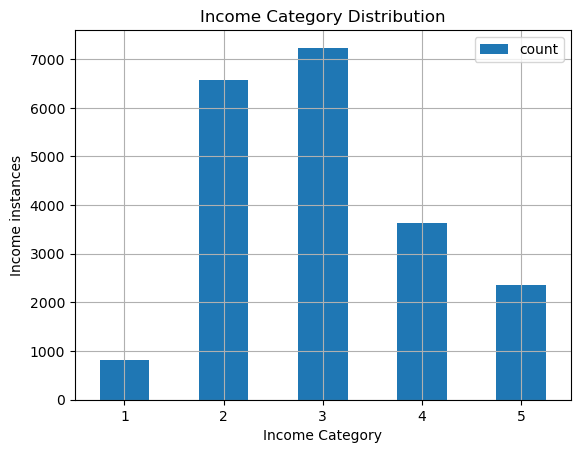

In [44]:
df['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)

plt.title("Income Category Distribution")
plt.xlabel("Income Category")
plt.ylabel("Income instances")

plt.legend()
plt.show()

In [45]:
# Now remove the column name as "income_cat" -

for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat", axis=1, inplace=True)
    

In [46]:
strat_train_set # Column "income_cat" is removed from both train and test data set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,500001.0,<1H OCEAN
5960,-117.83,34.11,29.0,2671.0,437.0,1484.0,445.0,4.9844,203000.0,INLAND
4753,-118.33,34.04,31.0,1090.0,251.0,955.0,239.0,2.9130,192500.0,<1H OCEAN
15423,-117.26,33.20,13.0,3163.0,725.0,1675.0,629.0,2.8214,121900.0,<1H OCEAN
9788,-120.51,35.91,39.0,768.0,162.0,264.0,118.0,5.3245,250000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
13602,-117.25,34.15,30.0,1770.0,380.0,990.0,348.0,3.3000,97600.0,INLAND
14693,-117.11,32.79,16.0,1791.0,518.0,1006.0,491.0,3.5179,129300.0,NEAR OCEAN
15591,-116.34,33.36,24.0,2746.0,514.0,731.0,295.0,3.3214,176400.0,INLAND
5676,-118.29,33.71,36.0,3135.0,746.0,1815.0,697.0,3.7596,300000.0,NEAR OCEAN


In [47]:
df = strat_train_set.copy() # Now we use only df further

<Axes: xlabel='latitude', ylabel='longitude'>

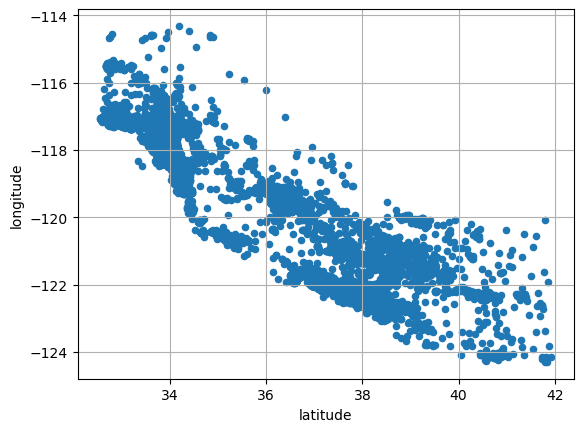

In [48]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True)
# The points like very dark we'll fix further

<Axes: xlabel='latitude', ylabel='longitude'>

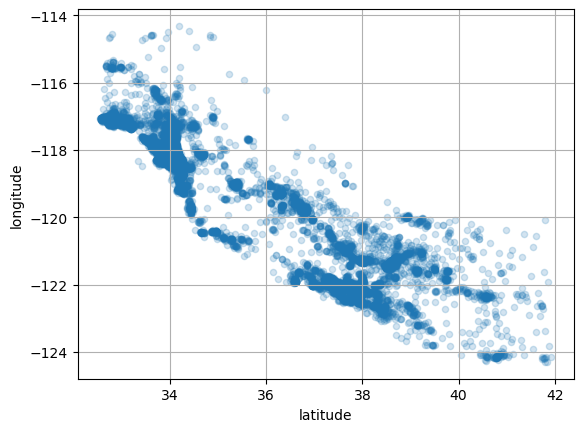

In [49]:
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, alpha=0.2)
# By seen this don't you think it's look like "California" map

<Axes: xlabel='latitude', ylabel='longitude'>

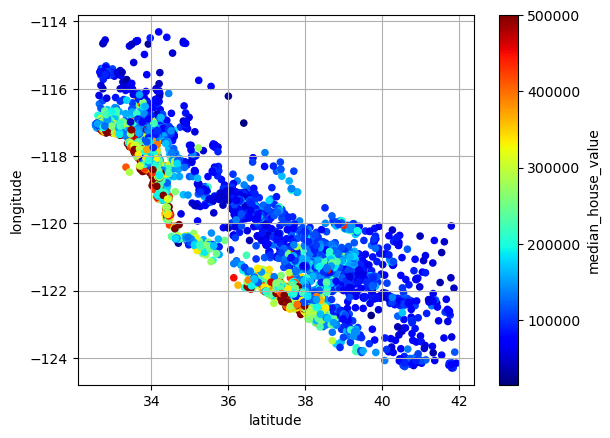

In [50]:
## Using "cmap" 
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, cmap="jet", c="median_house_value")

<Axes: xlabel='latitude', ylabel='longitude'>

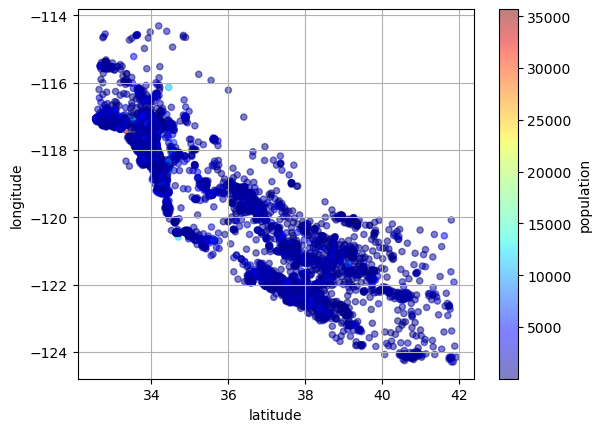

In [51]:
## cmap on population -
df.plot(kind="scatter", x="latitude", y="longitude", grid=True, cmap="jet", c="population", alpha=0.5)

In [52]:
df.drop(labels="ocean_proximity", axis=1, inplace=True)
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924673,-0.113569,0.052591,0.080166,0.109755,0.065387,-0.022082,-0.052345
latitude,-0.924673,1.000000,0.012366,-0.043967,-0.077201,-0.118356,-0.081548,-0.073493,-0.137864
housing_median_age,-0.113569,0.012366,1.000000,-0.362810,-0.322190,-0.296377,-0.302394,-0.112490,0.116305
total_rooms,0.052591,-0.043967,-0.362810,1.000000,0.929288,0.853244,0.917442,0.200391,0.136801
total_bedrooms,0.080166,-0.077201,-0.322190,0.929288,1.000000,0.873909,0.979684,-0.009279,0.049523
population,0.109755,-0.118356,-0.296377,0.853244,0.873909,1.000000,0.902632,0.002690,-0.024592
households,0.065387,-0.081548,-0.302394,0.917442,0.979684,0.902632,1.000000,0.011088,0.066788
median_income,-0.022082,-0.073493,-0.112490,0.200391,-0.009279,0.002690,0.011088,1.000000,0.687873
median_house_value,-0.052345,-0.137864,0.116305,0.136801,0.049523,-0.024592,0.066788,0.687873,1.000000


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

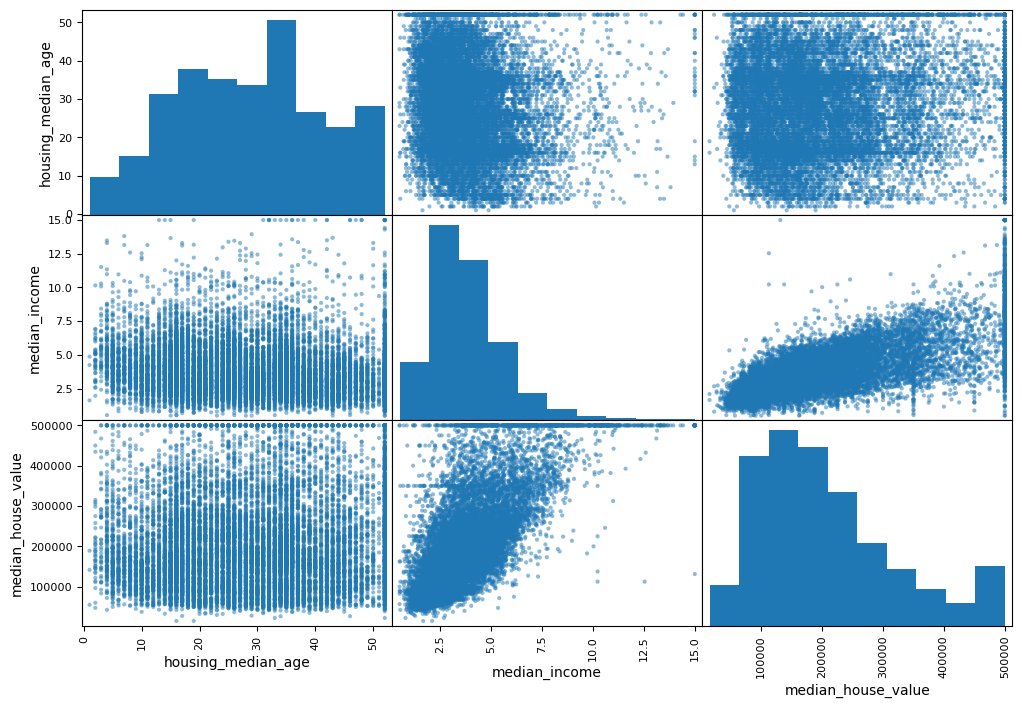

In [53]:
### Scatter matrix from pandas

from pandas.plotting import scatter_matrix
attributes = ["housing_median_age", "median_income", "median_house_value"]
scatter_matrix(df[attributes], figsize=(12, 8))